# **Slash Data Analysis Internship:**
## *What is the aim of project*

**Analyze the Amazon sales report dataset attached in the mail to extract meaningful insights,
preprocess the data, create visualizations using Python libraries (matplotlib and seaborn),
build predictive models, and develop a dashboard for comprehensive data presentation**


### Import important libraries

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import warnings
warnings.filterwarnings('ignore')

##  Exploratory Data Analysis (EDA)

In [136]:
df=pd.read_csv('/content/Amazon Sale Report.csv')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


## Understand columns

index: It represents the row number in the DataFrame.

Order ID: A unique identifier for each order.

Date: The date the order was placed.

Status: The current status of the order (e.g., pending, shipped, delivered, cancelled).

Fulfilment: Indicates how the order is fulfilled (e.g., by the seller, by a third party, etc.).

Sales Channel: The platform or method through which the sale was made (e.g., online store, physical store).

ship-service-level: The level of shipping service selected for the order (e.g., standard, expedited).

Style: The style or variant of the product.

SKU: Stock Keeping Unit, a unique identifier for each product for inventory purposes.

Category: The category to which the product belongs (e.g., electronics, clothing).

Size: The size of the product, if applicable (e.g., small, medium, large).

ASIN: Amazon Standard Identification Number, a unique identifier for products on Amazon.

Courier Status: The status of the shipment with the courier (e.g., in transit, delivered).

Qty: Quantity of the product ordered.

currency: The currency in which the transaction was made (e.g., USD, EUR).

Amount: The total amount of the order.

ship-city: The city to which the order is being shipped.

ship-state: The state or region to which the order is being shipped.

ship-postal-code: The postal code of the shipping address.

ship-country: The country to which the order is being shipped.

promotion-ids: Identifiers for any promotions applied to the order.

B2B: Indicates if the order is a Business-to-Business transaction.

fulfilled-by: Indicates who is responsible for fulfilling the order (e.g., the seller, Amazon).

Unnamed: 22: Typically represents an unnamed or extra column that may need to be removed.

In [137]:
df.shape

(128975, 24)

In [138]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [140]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [141]:
df['Unnamed: 22'].value_counts()

Unnamed: 22
False    79925
Name: count, dtype: int64

In [142]:
df.drop('Unnamed: 22',axis=1,inplace=True)

In [143]:
df.drop('index',axis=1,inplace=True)

### data types of each column and identify any potential issues

- Date
- Amount

In [144]:
df['ship-postal-code' ]=df['ship-postal-code'].astype('object')

In [145]:
df['Date']=pd.to_datetime(df['Date'])
df['Amount'].astype('float')

0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128970     517.00
128971     999.00
128972     690.00
128973    1199.00
128974     696.00
Name: Amount, Length: 128975, dtype: float64

In [146]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

## **Summary Statistics**

In [147]:
df.describe()

,Date,Qty,Amount,Day,Month,Year
count,128975,128975.000000,121180.000000,128975.000000,128975.000000,128975.0
mean,2022-05-12 11:49:27.951928576,0.904431,648.561465,14.925978,4.909192,2022.0
min,2022-03-31 00:00:00,0.000000,0.000000,1.000000,3.000000,2022.0
25%,2022-04-20 00:00:00,1.000000,449.000000,7.000000,4.000000,2022.0
50%,2022-05-10 00:00:00,1.000000,605.000000,15.000000,5.000000,2022.0
75%,2022-06-04 00:00:00,1.000000,788.000000,22.000000,6.000000,2022.0
max,2022-06-29 00:00:00,15.000000,5584.000000,31.000000,6.000000,2022.0
std,NaN,0.313354,281.211687,8.742876,0.818402,0.0


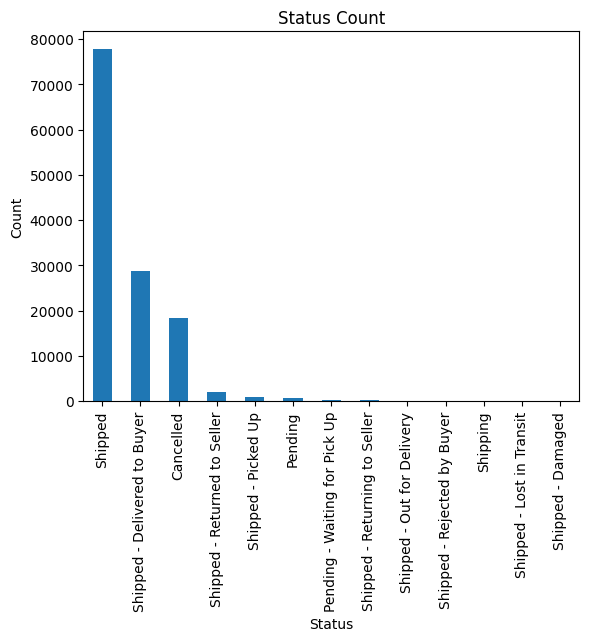

In [148]:
df['Status'].value_counts().plot(kind='bar')
plt.title('Status Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

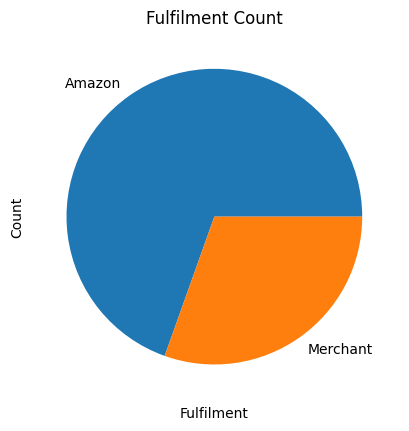

In [149]:
df['Fulfilment'].value_counts().plot(kind='pie')
plt.title('Fulfilment Count')
plt.xlabel('Fulfilment')
plt.ylabel('Count')
plt.show()

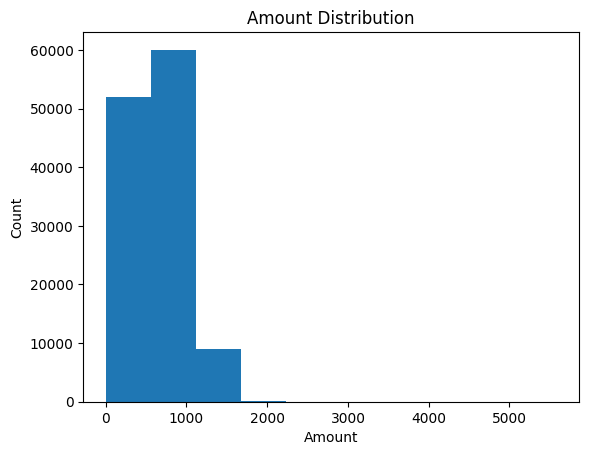

In [150]:
df['Amount'].plot(kind='hist')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Amount over Time')

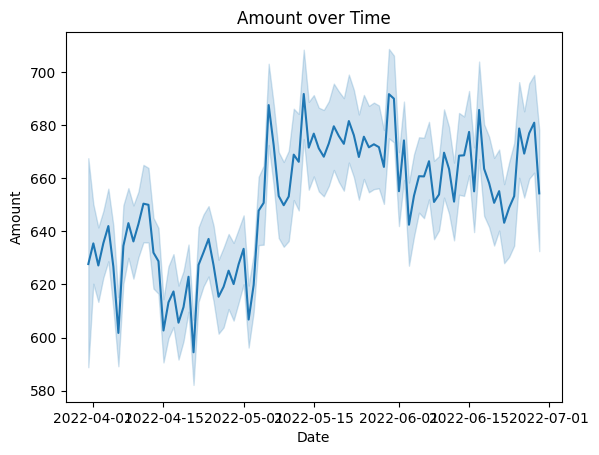

In [151]:
sns.lineplot(data=df, x='Date', y='Amount')
plt.title('Amount over Time')

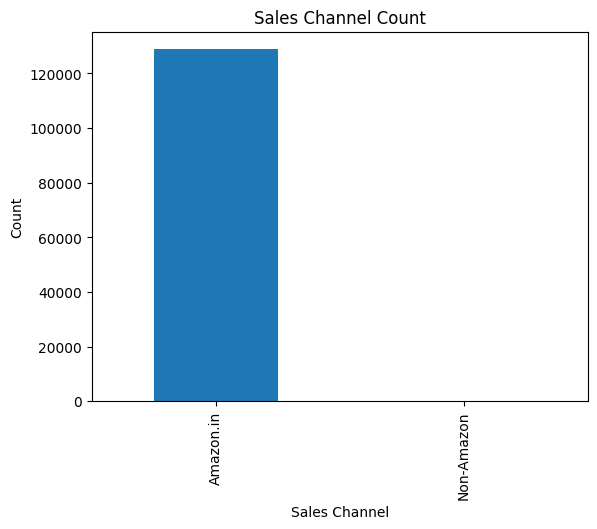

In [152]:
df['Sales Channel '].value_counts().plot(kind='bar')
plt.title('Sales Channel Count')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

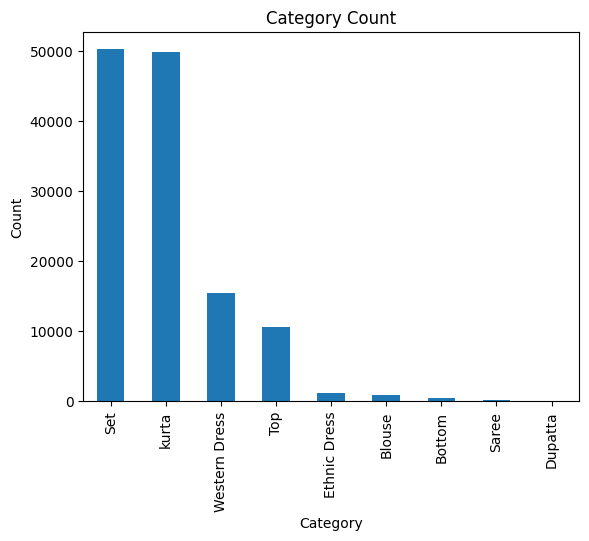

In [153]:
df['Category'].value_counts().plot(kind='bar')
plt.title('Category Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [154]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Day                       0
Month                     0
Year                      0
dtype: int64

In [155]:
df['ship-city'].fillna('Unknown', inplace=True)
df['ship-state'].fillna('Unknown', inplace=True)
df['ship-postal-code'].fillna(0, inplace=True)
df['ship-country'].fillna('Unknown', inplace=True)
df['promotion-ids'].fillna('None', inplace=True)
df['fulfilled-by'].fillna('Unknown', inplace=True)
df = df.dropna(subset=['Amount'])
df['Courier Status'].fillna('Unknown', inplace=True)

In [156]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Day                   0
Month                 0
Year                  0
dtype: int64

## Outlier Detection and Treatment

# We can a detect outliers using " Box Blot "


<Axes: >

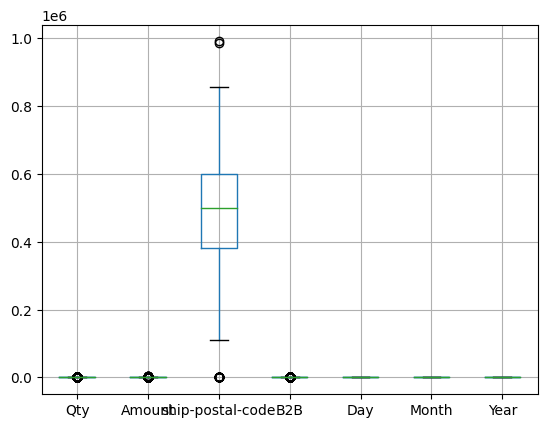

In [157]:
df.boxplot()

<Axes: >

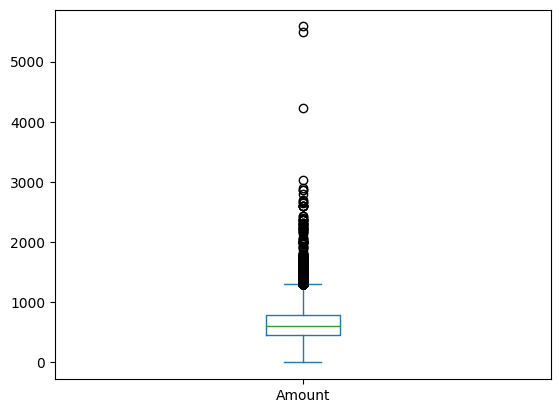

In [158]:
df['Amount'].plot(kind='box')

<Axes: >

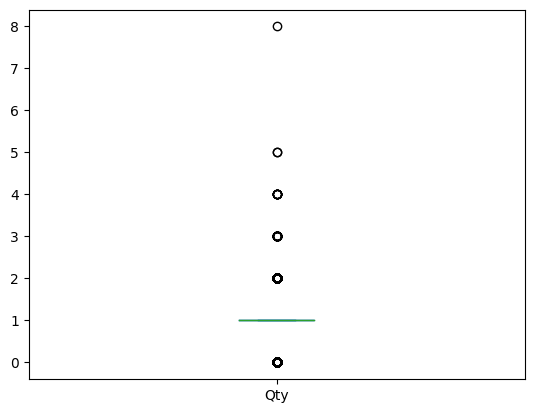

In [159]:
df['Qty'].plot(kind='box')

1. Using Matplotlib and Seaborn:
○ Create visualizations to understand data distributions and relationships.
○ Examples include histograms, bar plots, line plots, and heatmaps.

2. Visual Analysis:
○ Visualize sales trends over time (e.g., monthly sales trends).
○ Identify top-selling products and categories using bar plots.
○ Analyze regional sales distributions using geographical visualizations.


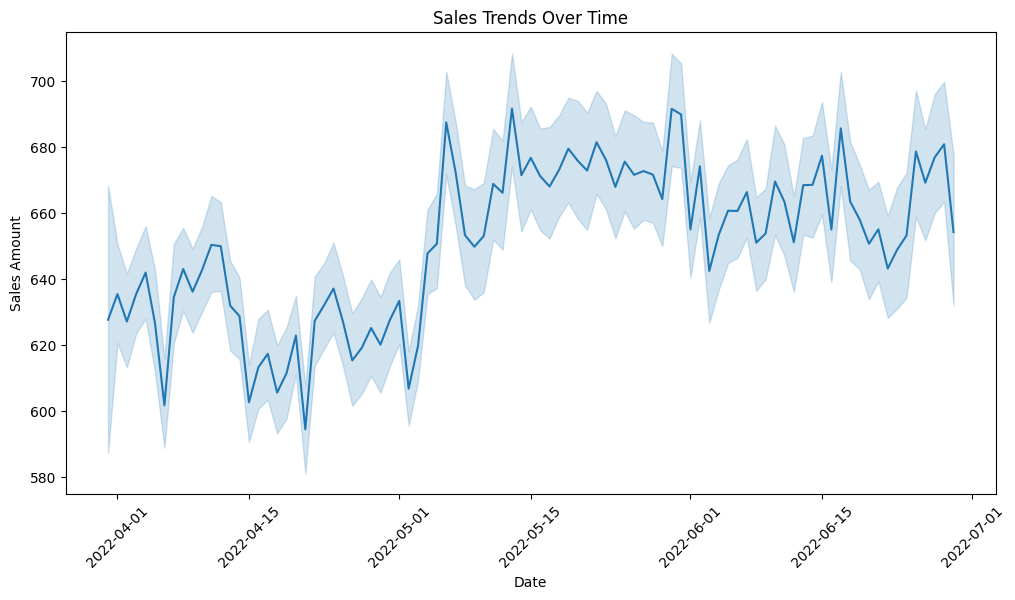

In [160]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount', data=df)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

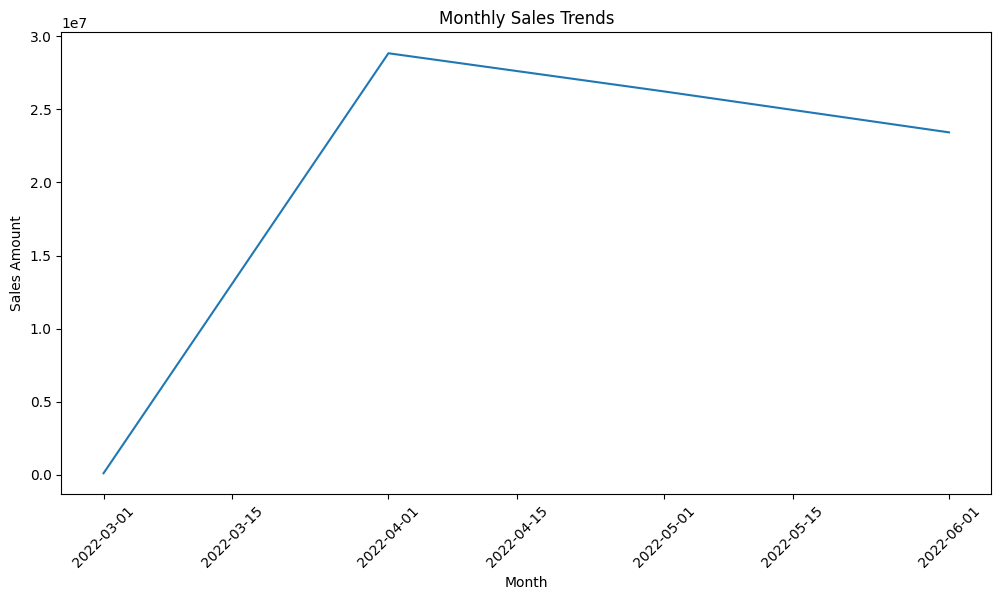

In [161]:
# Visualize monthly sales trends
monthly_sales = df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

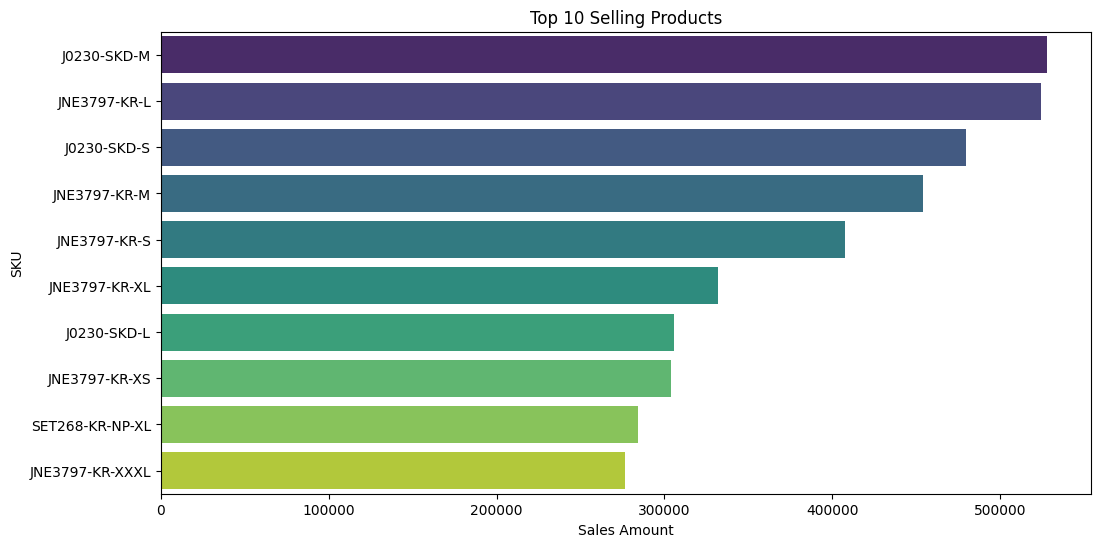

In [162]:
# Identify top-selling products using bar plots
top_products = df.groupby('SKU')['Amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='SKU', data=top_products, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Sales Amount')
plt.ylabel('SKU')
plt.show()

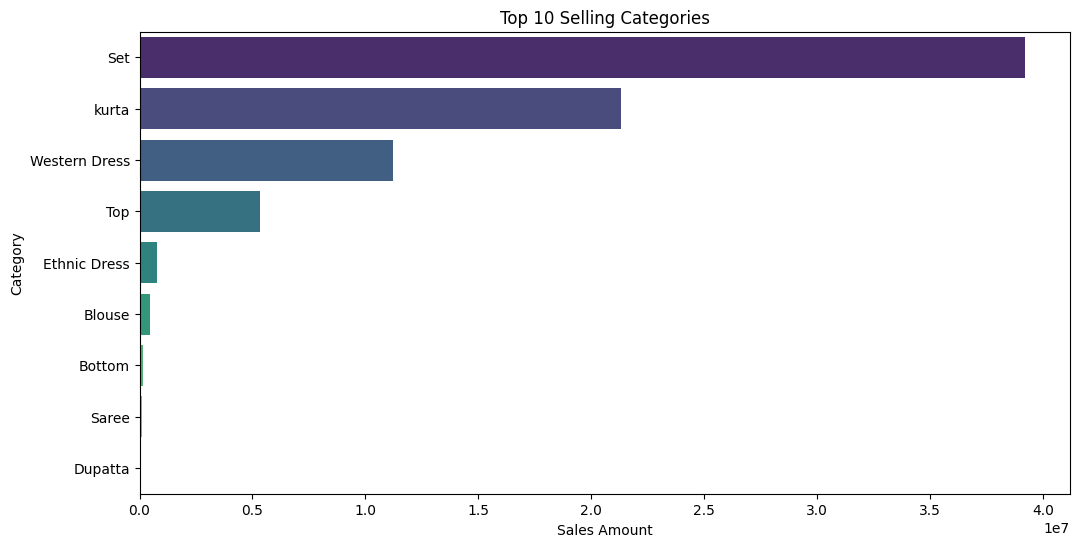

In [163]:

# Identify top-selling categories using bar plots
top_categories = df.groupby('Category')['Amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Category', data=top_categories, palette='viridis')
plt.title('Top 10 Selling Categories')
plt.xlabel('Sales Amount')
plt.ylabel('Category')
plt.show()

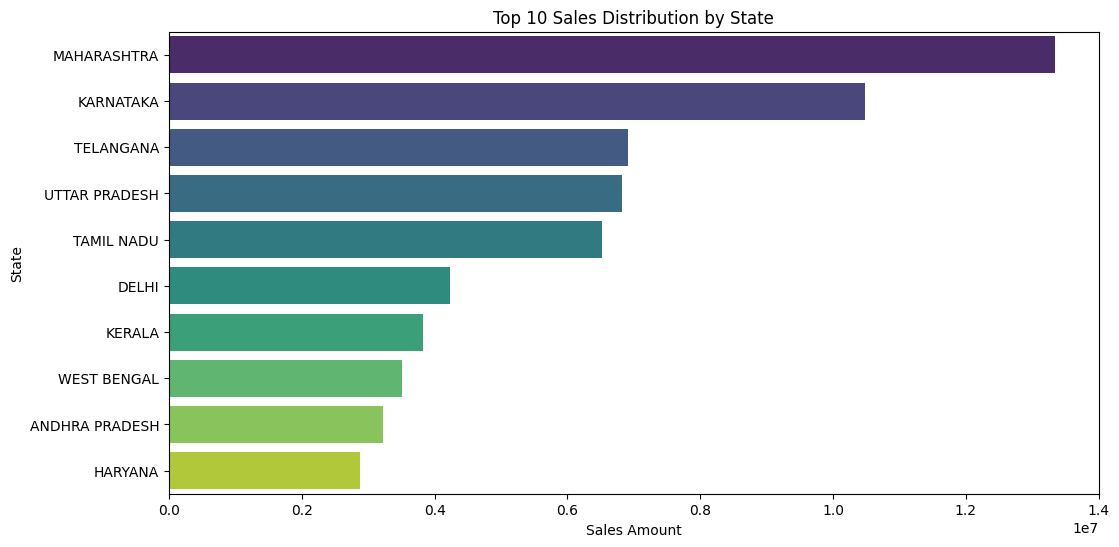

In [167]:
state_sales = df.groupby('ship-state')['Amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='ship-state', data=state_sales, palette='viridis')
plt.title('Top 10 Sales Distribution by State')
plt.xlabel('Sales Amount')
plt.ylabel('State')
plt.show()

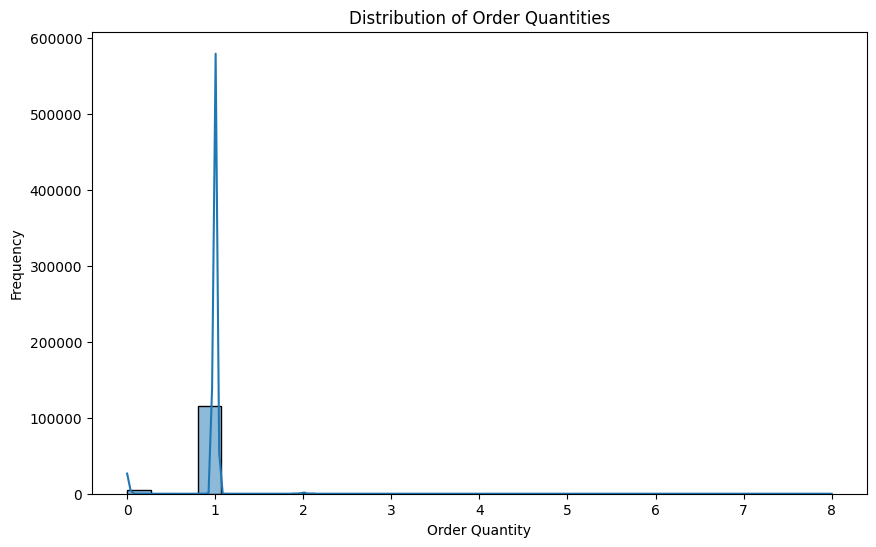

In [169]:
# Histogram of order quantities
plt.figure(figsize=(10, 6))
sns.histplot(df['Qty'], bins=30, kde=True)
plt.title('Distribution of Order Quantities')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()

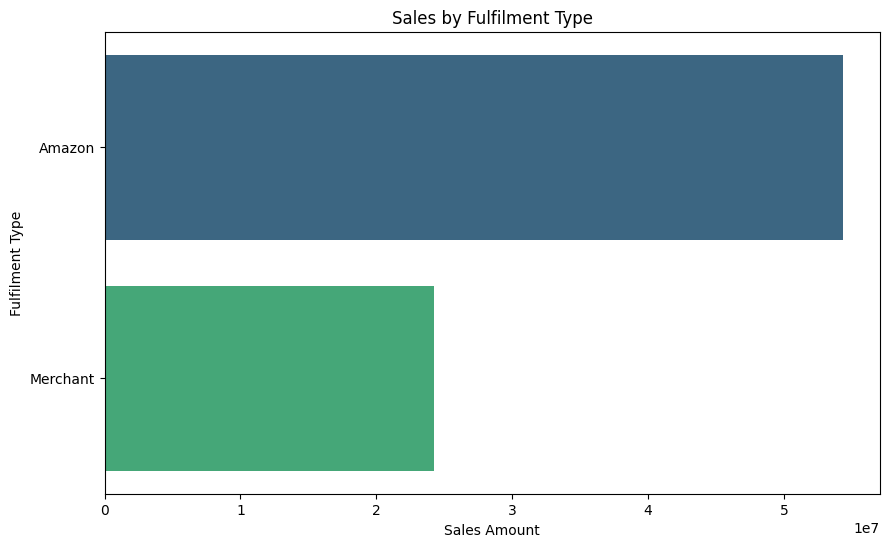

In [170]:
# Sales by fulfilment type
fulfilment_sales = df.groupby('Fulfilment')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='Fulfilment', data=fulfilment_sales, palette='viridis')
plt.title('Sales by Fulfilment Type')
plt.xlabel('Sales Amount')
plt.ylabel('Fulfilment Type')
plt.show()


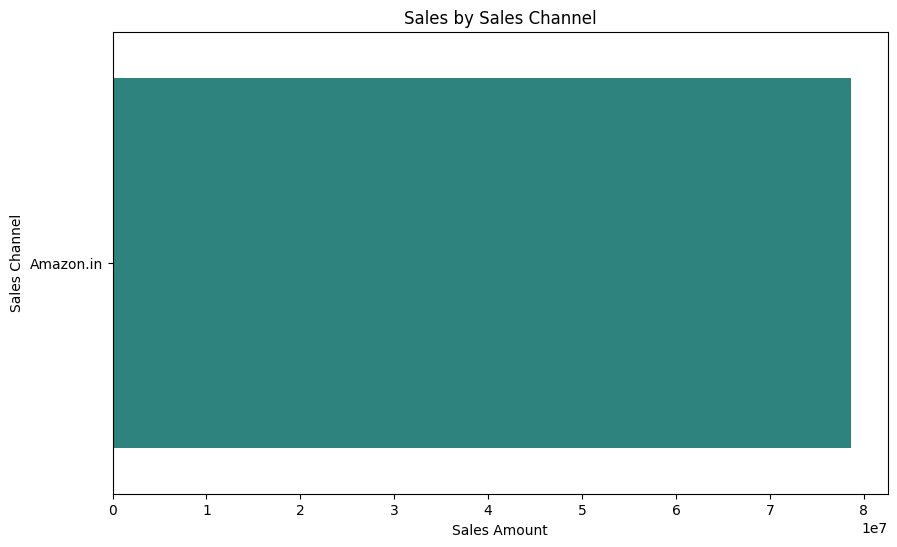

In [173]:
# Sales by sales channel
sales_channel_sales = df.groupby('Sales Channel ')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='Sales Channel ', data=sales_channel_sales, palette='viridis')
plt.title('Sales by Sales Channel')
plt.xlabel('Sales Amount')
plt.ylabel('Sales Channel')
plt.show()


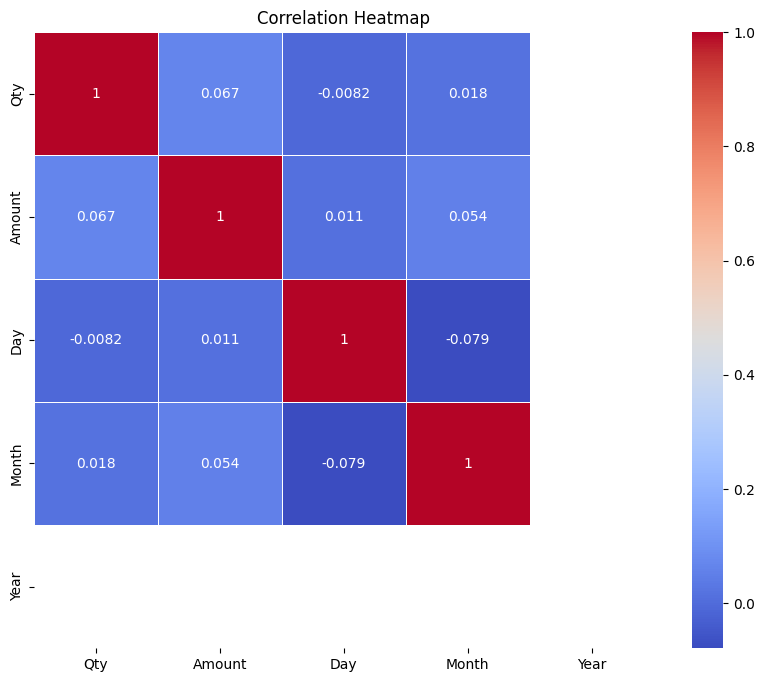

In [174]:
# Correlation heatmap
corr = df[['Qty', 'Amount', 'Day', 'Month', 'Year']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


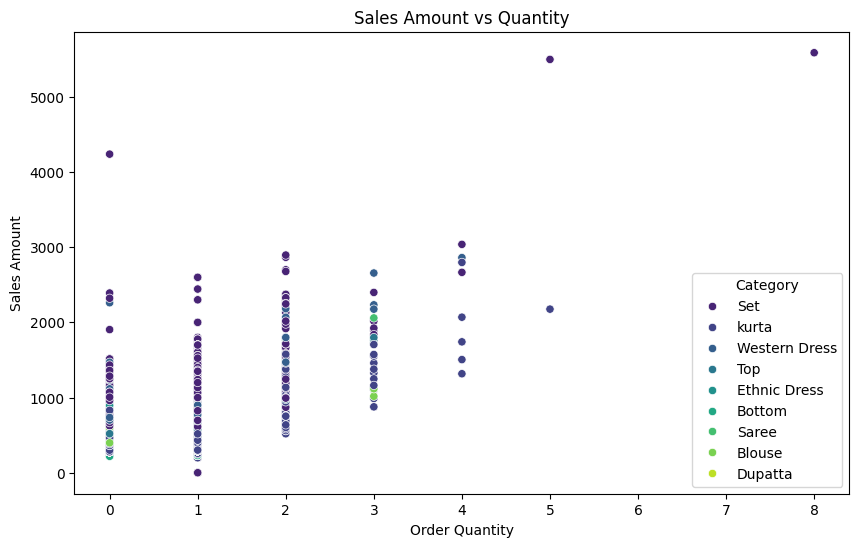

In [175]:
# Scatter plot of sales amount vs quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Qty', y='Amount', data=df, hue='Category', palette='viridis')
plt.title('Sales Amount vs Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Sales Amount')
plt.show()


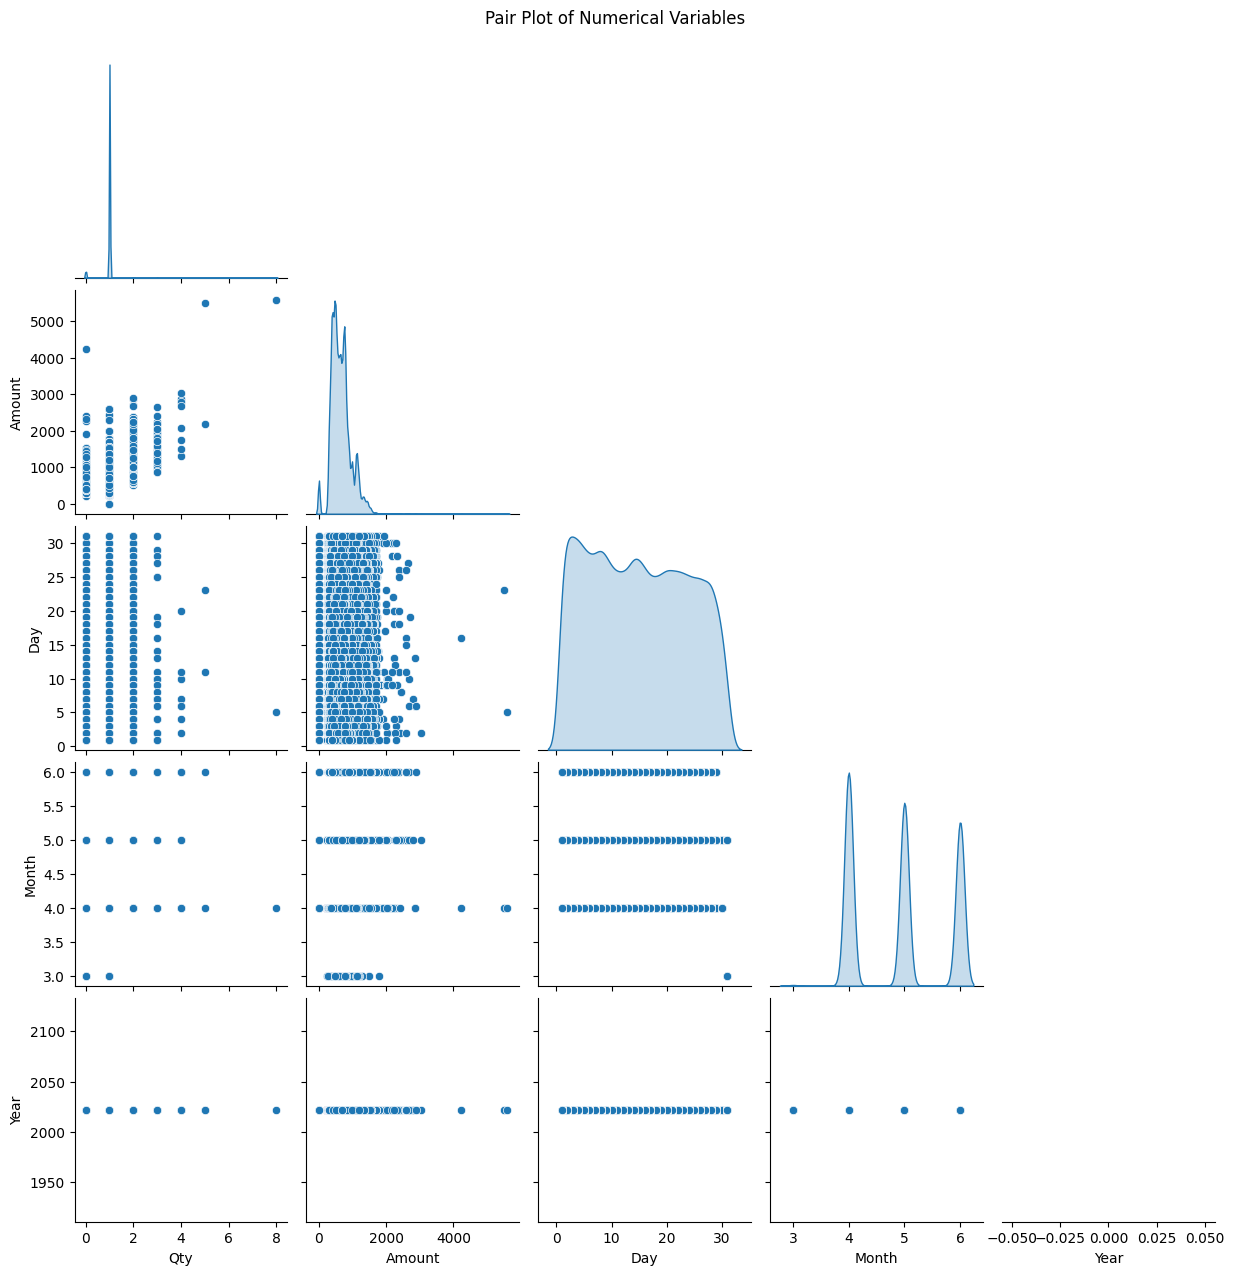

In [176]:
# Pair plot of numerical variables
sns.pairplot(df[['Qty', 'Amount', 'Day', 'Month', 'Year']], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


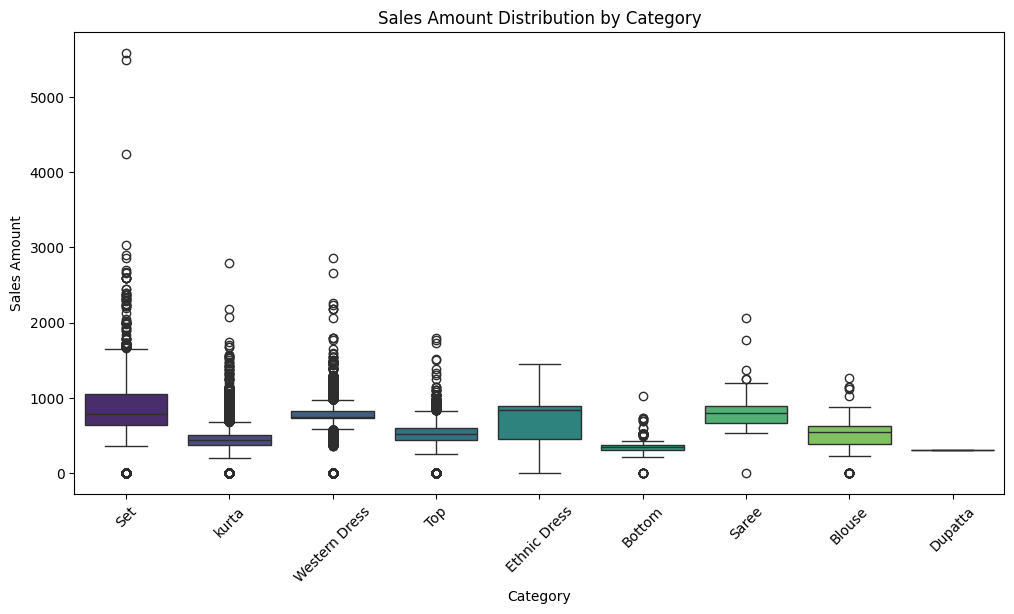

In [177]:
# Box plot of sales amount by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Amount', data=df, palette='viridis')
plt.title('Sales Amount Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()


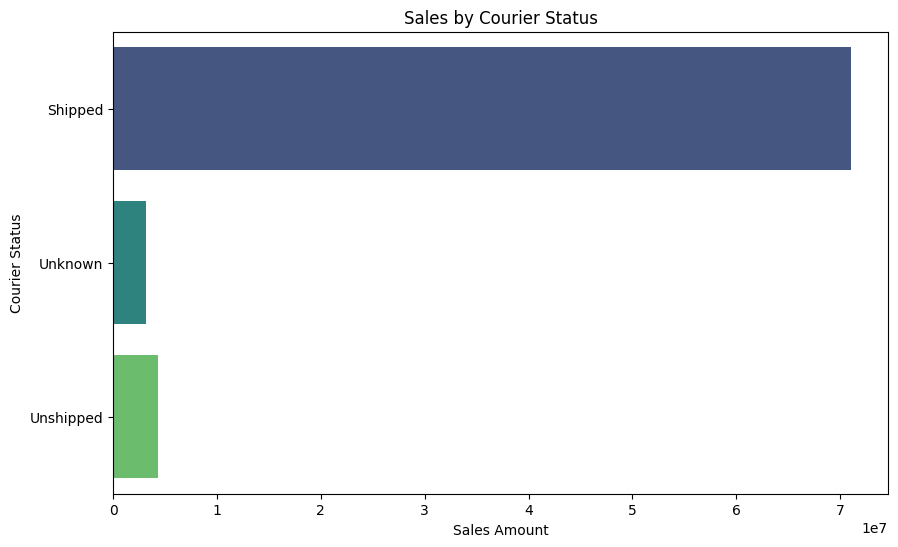

In [178]:
# Sales by courier status
courier_status_sales = df.groupby('Courier Status')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='Courier Status', data=courier_status_sales, palette='viridis')
plt.title('Sales by Courier Status')
plt.xlabel('Sales Amount')
plt.ylabel('Courier Status')
plt.show()


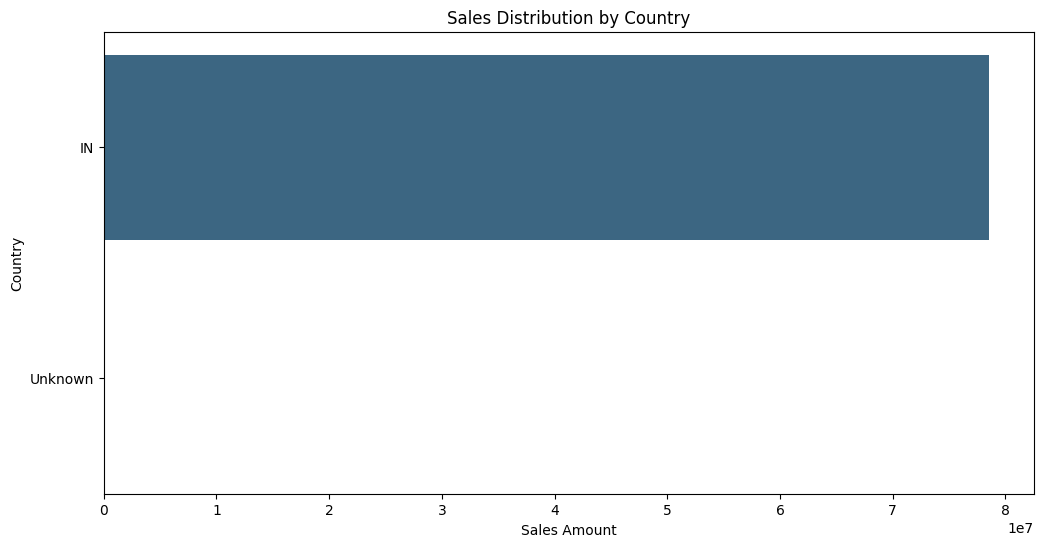

In [179]:
# Sales by country
country_sales = df.groupby('ship-country')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='ship-country', data=country_sales, palette='viridis')
plt.title('Sales Distribution by Country')
plt.xlabel('Sales Amount')
plt.ylabel('Country')
plt.show()


# **Data Preparation**

In [188]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_cols = ['Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'ship-city', 'ship-state', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'currency']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Order ID', 'Date', 'Status'])
y = df['Status']

le_status = LabelEncoder()
y = le_status.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model

In [189]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.8332645651097541
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2134
           1       0.00      0.00      0.00       125
           2       0.00      0.00      0.00        57
           3       0.82      1.00      0.90     15552
           5       0.88      0.81      0.84      5757
           7       0.00      0.00      0.00         9
           8       0.13      0.03      0.05       195
          10       0.25      0.00      0.01       377
          11       0.00      0.00      0.00        30

    accuracy                           0.83     24236
   macro avg       0.23      0.20      0.20     24236
weighted avg       0.74      0.83      0.78     24236



# decision tree model

In [190]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9632365076745337
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2134
           1       0.91      0.88      0.89       125
           2       0.85      0.91      0.88        57
           3       1.00      1.00      1.00     15552
           5       0.93      0.92      0.93      5757
           7       0.14      0.11      0.12         9
           8       0.89      0.90      0.90       195
           9       0.00      0.00      0.00         0
          10       0.07      0.09      0.08       377
          11       0.10      0.10      0.10        30

    accuracy                           0.96     24236
   macro avg       0.59      0.59      0.59     24236
weighted avg       0.97      0.96      0.96     24236



# random forest model

In [191]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9813087968311602
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2134
           1       0.99      0.88      0.93       125
           2       0.85      0.98      0.91        57
           3       1.00      1.00      1.00     15552
           5       0.93      1.00      0.96      5757
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         9
           8       0.93      0.94      0.94       195
          10       0.60      0.01      0.02       377
          11       0.00      0.00      0.00        30

    accuracy                           0.98     24236
   macro avg       0.63      0.58      0.58     24236
weighted avg       0.97      0.98      0.97     24236



# **Thanks**